**DataSet Analysis Curitiba - AirBnb**

Setp by setp:

1. Import all libraries
2. Loading DataSet
3. Exploration
4. Data Cleaning
5. Data Analysis

Step 1: Importing libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openai import containers

%matplotlib inline

Step 2: Loading DataSet

In [24]:
data = pd.read_csv('listings_summary.csv', encoding_errors='ignore')

**Step 3: Starting Exploration**

In [66]:
# --- 1. Definição das Zonas

zona_central = [
    'Centro', 'Cidade Nova', 'Estácio', 'Gamboa', 'Rio Comprido',
    'Santa Teresa', 'Santo Cristo', 'São Cristóvão',
    'Benfica', 'Catumbi', 'Saúde', 'Vasco da Gama', 'Caju'
]

zona_sul = [
    'Botafogo',
    'Catete', 'Copacabana', 'Cosme Velho', 'Flamengo',
    'Gávea', 'GÃ¡vea', 'Glória', 'Humaitá', 'Ipanema', 'Jardim Botânico',
    'Lagoa', 'Laranjeiras', 'Leblon', 'Leme', 'Rocinha', 'São Conrado',
    'Urca', 'Vidigal'
]

zona_oeste = [
    'Anil', 'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba', 'Campo Grande',
    'Camorim', 'Cidade de Deus', 'Cosmos', 'Curicica', 'Freguesia (Jacarepaguá)',
    'Freguesia (Jacarepagua)',
    'Gardênia Azul', 'Guaratiba', 'Inhoaíba', 'Itanhangá', 'ItanhangÃ¡',
    'Jacarepaguá', 'Jardim Sulacap', 'Joá', 'Paciência', 'Padre Miguel',
    'Praça Seca', 'Recreio dos Bandeirantes', 'Santa Cruz', 'Santíssimo',
    'Senador Camará', 'Taquara', 'Vargem Grande', 'Vargem Pequena', 'Vila Valqueire',
    'Pechincha', 'Pedra de Guaratiba', 'Tanque', 'Magalhães Bastos', 'Realengo',
    'Vila Militar', 'Senador Vasconcelos', 'Deodoro', 'Gericinó',
    'Campo dos Afonsos', 'Sepetiba', 'Grumari'
]

zona_norte = [
    'Água Santa', 'Alto da Boa Vista', 'Andaraí', 'Bento Ribeiro', 'Bonsucesso',
    'Cachambi', 'Cacuia', 'Campinho', 'Cavalcanti', 'Del Castilho', 'Encantado',
    'Engenho da Rainha', 'Engenho de Dentro', 'Engenho Novo', 'Freguesia (Ilha)',
    'Grajaú', 'Higienópolis', 'Irajá', 'Jardim Carioca', 'Lins de Vasconcelos',
    'Mangueira', 'Maracanã', 'Marechal Hermes', 'Maria da Graça', 'Méier',
    'Olaria', 'Penha Circular', 'Piedade', 'Portuguesa', 'Praça da Bandeira',
    'Praia da Bandeira', 'Riachuelo', 'São Francisco Xavier', 'Tauá', 'Tijuca',
    'Todos os Santos', 'Vila da Penha', 'Vila Isabel',
    'Cordovil', 'Rocha Miranda', 'Vaz Lobo', 'Barros Filho', 'Osvaldo Cruz',
    'Vicente de Carvalho', 'Penha', 'Pilares', 'Rocha', 'Cocotá',
    'Ricardo de Albuquerque', 'Sampaio', 'Parada de Lucas', 'Quintino Bocaiúva',
    'Jacaré', 'Pavuna', 'Brás de Pina', 'Jardim Guanabara', 'Paquetá', 'Galeão',
    'Bancários', 'Inhaúma', 'Colégio', 'Parque Anchieta', 'Abolição', 'Anchieta',
    'Ramos', 'Complexo do Alemão', 'Vila Kosmos', 'Moneró', 'Pitangueiras',
    'Guadalupe', 'Tomás Coelho', 'Cascadura', 'Ribeira', 'Honório Gurgel',
    'Engenheiro Leal', 'Vigário Geral', 'Vista Alegre', 'Manguinhos', 'Coelho Neto',
    'Maré', 'Parque Colúmbia', 'Madureira'
]

# --- 2. Criação do Dicionário Mestre (igual a antes) ---
zone_mapping = {}
zone_mapping.update({hood: 'Zona Central' for hood in zona_central})
zone_mapping.update({hood: 'Zona Sul' for hood in zona_sul})
zone_mapping.update({hood: 'Zona Oeste' for hood in zona_oeste})
zone_mapping.update({hood: 'Zona Norte' for hood in zona_norte})

# --- 3. Aplicação no DataFrame
data['zona'] = data['neighbourhood'].map(zone_mapping)

# --- 4. Verificação
unmapped_neighbourhoods = data[data['zona'].isna()]['neighbourhood'].unique()

if len(unmapped_neighbourhoods) > 0:
    print(f"ATENÇÃO: Os seguintes bairros AINDA não foram mapeados:")
    print(unmapped_neighbourhoods)
else:
    print("SUCESSO! Todos os bairros foram mapeados para uma zona.")

# --- 5. Ver o resultado
print("\nNova Contagem de listagens por Zona:")
print(data['zona'].value_counts())

SUCESSO! Todos os bairros foram mapeados para uma zona.

Nova Contagem de listagens por Zona:
zona
Zona Sul        19249
Zona Oeste       9431
Zona Norte       2665
Zona Central     2370
Name: count, dtype: int64


In [12]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128


In [7]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33710,40289331,Loft/studio Apto Barra da Tijuca,120817094,Luis,NaN,Barra da Tijuca,-23.00629,-43.31821,Entire home/apt,500,2,0,NaN,NaN,1,9
33711,40289841,Loft em Santa Teresa,12983046,Christiane,NaN,Laranjeiras,-22.92799,-43.19134,Entire home/apt,202,7,0,NaN,NaN,1,16
33712,40290087,"Loft, Copacabana. 100 metros da praia.",134280245,Poliane,NaN,Copacabana,-22.96303,-43.17778,Entire home/apt,151,1,0,NaN,NaN,2,350
33713,40290464,Studio Ipanema,293527843,Rafael,NaN,Ipanema,-22.98503,-43.19928,Entire home/apt,252,1,1,2019-11-22,1.0,1,0
33714,40290908,QUARTO E SALA NOVO EM COPACABANA,64230796,Larissa,NaN,Copacabana,-22.96200,-43.17657,Entire home/apt,269,2,0,NaN,NaN,1,88


In [9]:
data.shape

(33715, 16)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33715 non-null  int64  
 1   name                            33654 non-null  object 
 2   host_id                         33715 non-null  int64  
 3   host_name                       33695 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   33715 non-null  object 
 6   latitude                        33715 non-null  float64
 7   longitude                       33715 non-null  float64
 8   room_type                       33715 non-null  object 
 9   price                           33715 non-null  int64  
 10  minimum_nights                  33715 non-null  int64  
 11  number_of_reviews               33715 non-null  int64  
 12  last_review                     

In [11]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.371500e+04,3.371500e+04,0.0,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,19149.000000,33715.000000,33715.000000
mean,1.837737e+07,7.333110e+07,NaN,-22.965208,-43.254228,651.860537,4.789826,9.374344,0.707232,5.996292,177.956251
std,1.182836e+07,7.577773e+07,NaN,0.035244,0.097488,1695.447098,22.640328,24.815311,0.927453,20.303420,149.766863
min,1.787800e+04,1.173900e+04,NaN,-23.073400,-43.737090,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.026686e+07,1.431560e+07,NaN,-22.984710,-43.323360,151.000000,1.000000,0.000000,0.110000,1.000000,0.000000
50%,1.425308e+07,5.277714e+07,NaN,-22.970850,-43.200220,290.000000,2.000000,1.000000,0.340000,1.000000,165.000000
75%,2.991364e+07,9.143910e+07,NaN,-22.946725,-43.187085,600.000000,4.000000,6.000000,0.980000,3.000000,350.000000
max,4.029091e+07,3.111796e+08,NaN,-22.750380,-43.104060,41982.000000,1123.000000,372.000000,10.080000,205.000000,365.000000


**Step 4: Data Cleaning**

In [13]:
# Drop all missing values rows
data.dropna(inplace=True)

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# Dealing with duplicates rows
data.duplicated().sum()

#Deleting Duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [30]:
data.dtypes

data['id'] = data['id'].astype(object)
data.dtypes

data['host_id'] = data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Step 5: Data Analysis**

<Axes: xlabel='price'>

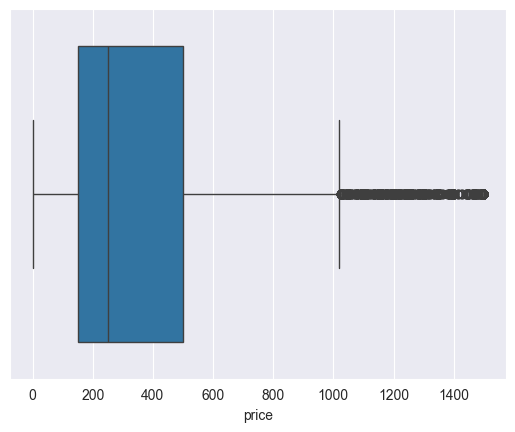

In [40]:
#Identifying outliers in price
df = data[data['price'] < 1500]
sns.boxplot(data=df, x='price')


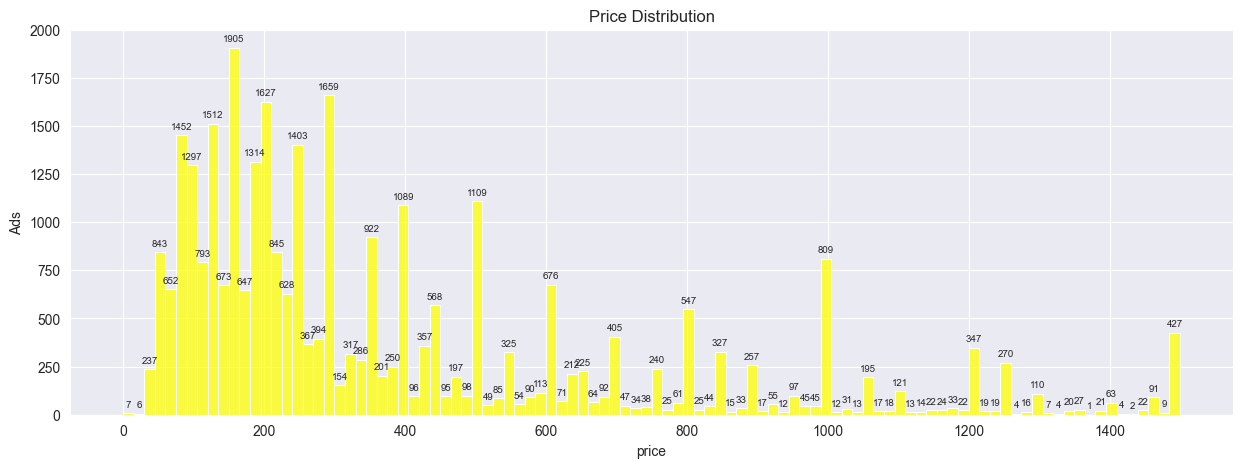

In [125]:
# Price Distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x='price', bins=100, color='yellow')
ax.bar_label(ax.containers[0], fmt='%d', padding = 3, fontsize=7)
plt.ylabel('Ads')
plt.title('Price Distribution')
plt.show()

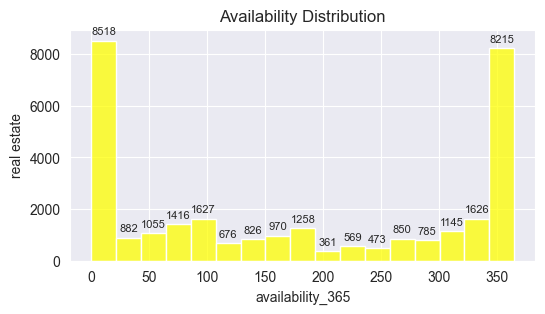

In [126]:
#Availability Distribution
plt.figure(figsize=(6,3))
ax = sns.histplot(data=df, x='availability_365', color='yellow')
ax.bar_label(ax.containers[0], fmt='%d', padding=3, fontsize=8)
plt.title('Availability Distribution')
plt.ylabel('real estate')
plt.show()

**BI Variable Analysis**
One variable dependency in another variable

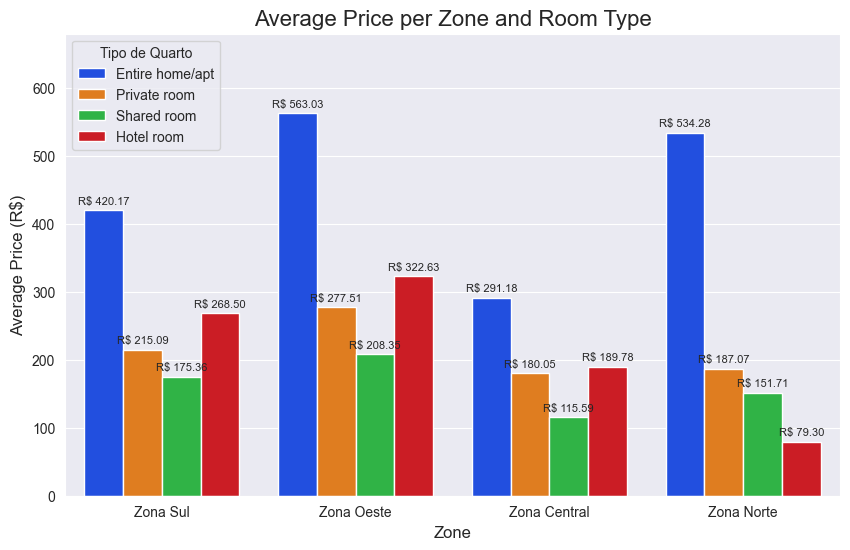

In [115]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='zona', y='price',hue='room_type', palette='bright', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='R$ %.2f', padding=3, fontsize=8)
ax.set_ylim(0, ax.get_ylim()[1] * 1.15)

plt.title('Average Price per Zone and Room Type', fontsize=16)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Average Price (R$)', fontsize=12)
plt.legend(title='Tipo de Quarto')
plt.show()

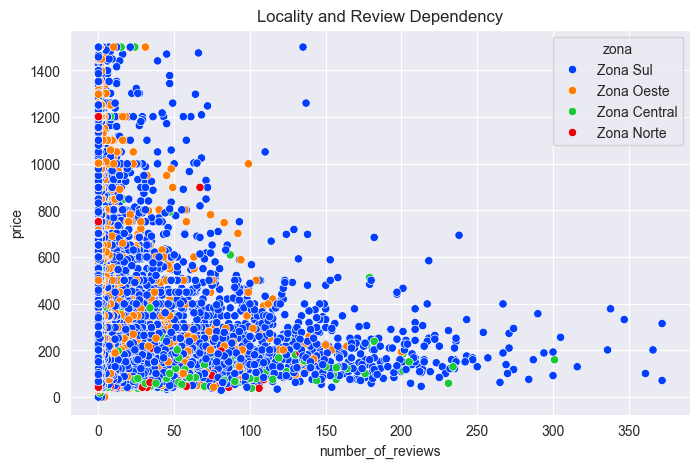

In [101]:
# Number of reviews and price rel

plt.figure(figsize=(8,5))
plt.title('Locality and Review Dependency')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='zona', palette='bright')
plt.show()

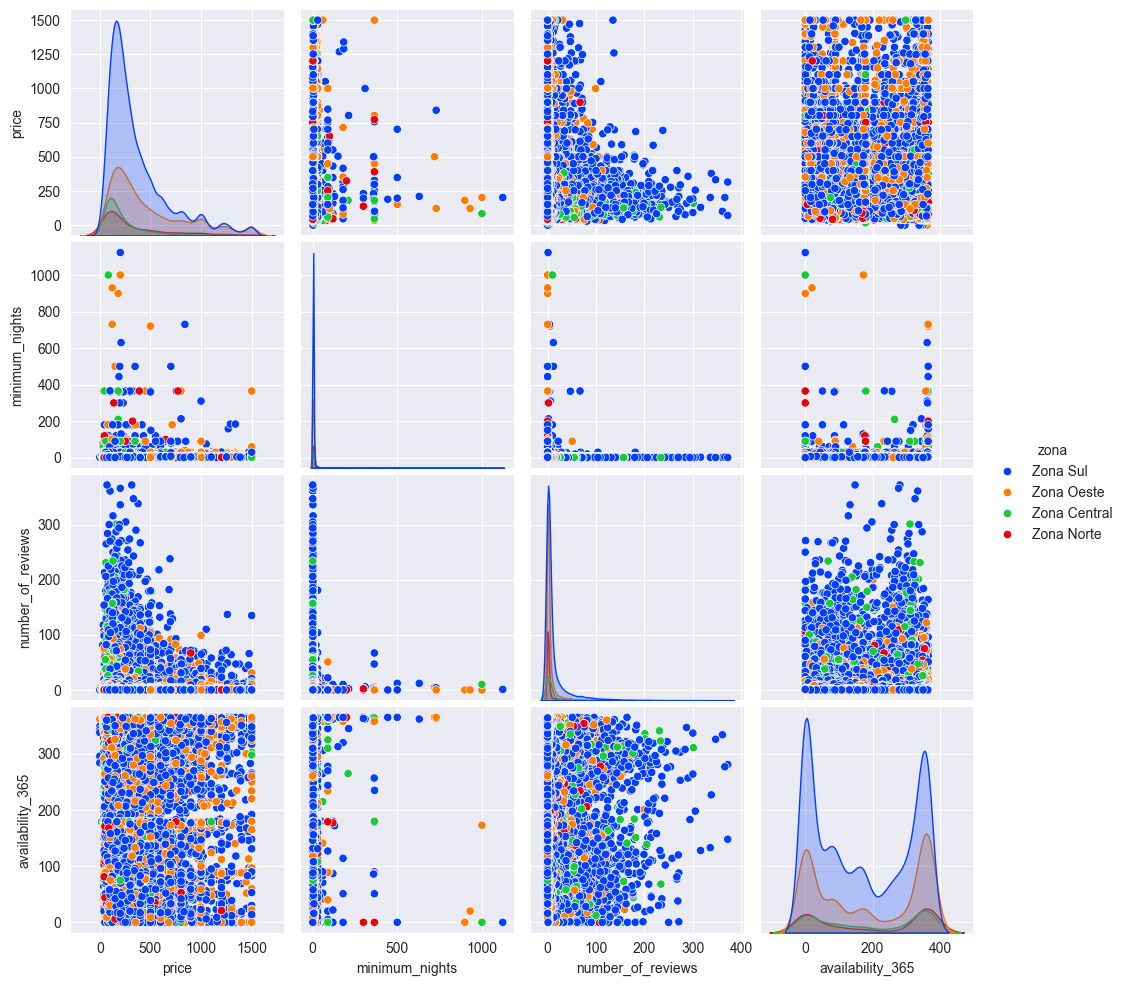

In [102]:
sns.pairplot(data=df, vars=['price','minimum_nights', 'number_of_reviews', 'availability_365'], hue = 'zona', palette='bright')

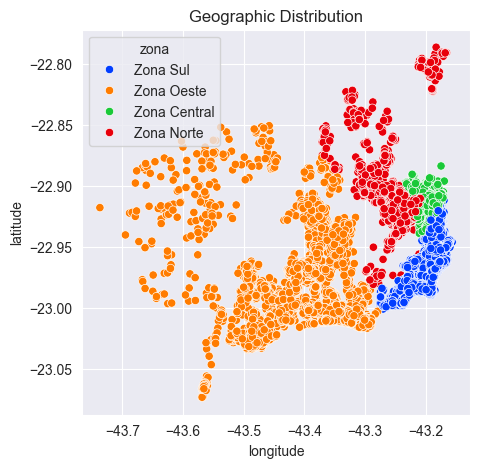

In [104]:
# Geographical view Rio de Janeiro

plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='zona', palette='bright')
plt.title('Geographic Distribution')
plt.show()

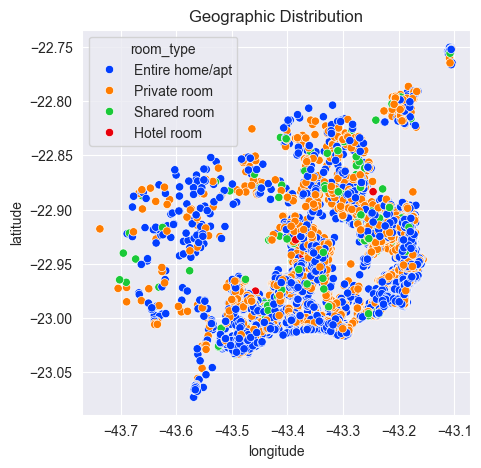

In [105]:
# Geographical view Rio de Janeiro

plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', palette='bright')
plt.title('Locality and Review Dependency')
plt.title('Geographic Distribution')
plt.show()

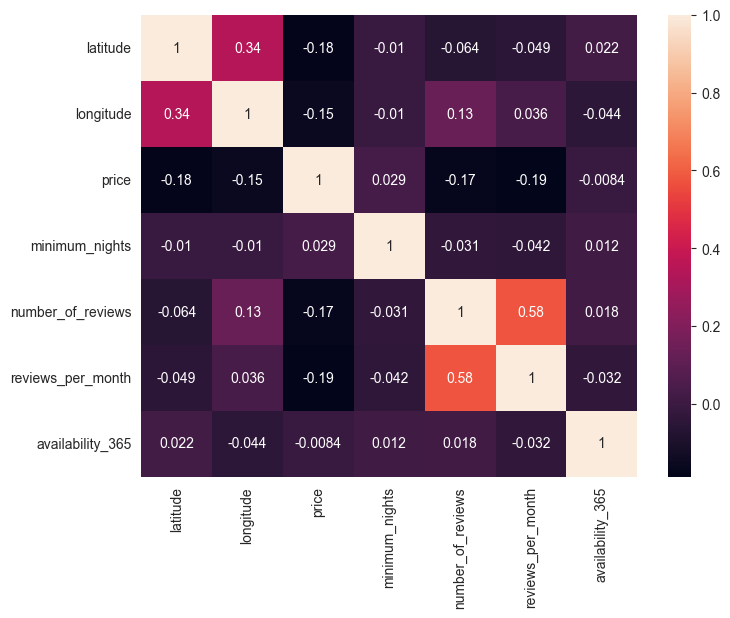

In [107]:
# heat map - Correlation of one variable with others for numerical column

corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()
corr

plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True)
plt.show()

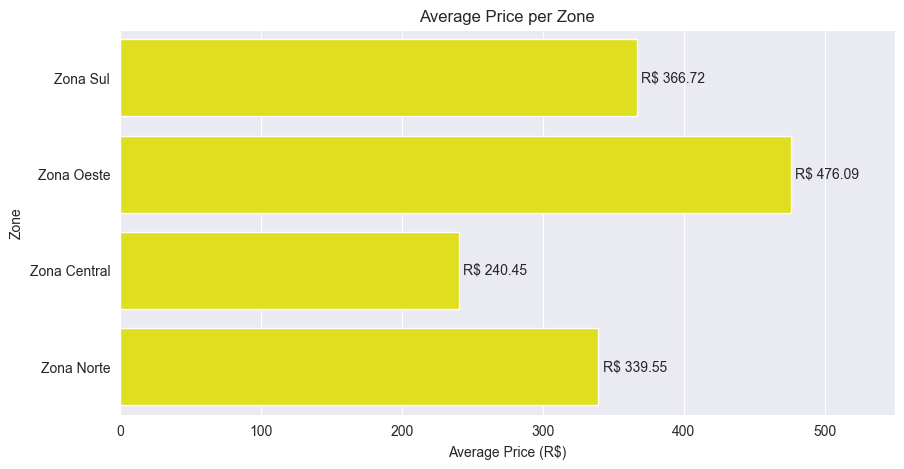

In [116]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='price', y='zona', color='yellow', errorbar=None)
ax.bar_label(ax.containers[0], fmt='R$ %.2f', padding=3)
ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
plt.title('Average Price per Zone')
plt.xlabel('Average Price (R$)')
plt.ylabel('Zone')
plt.show()

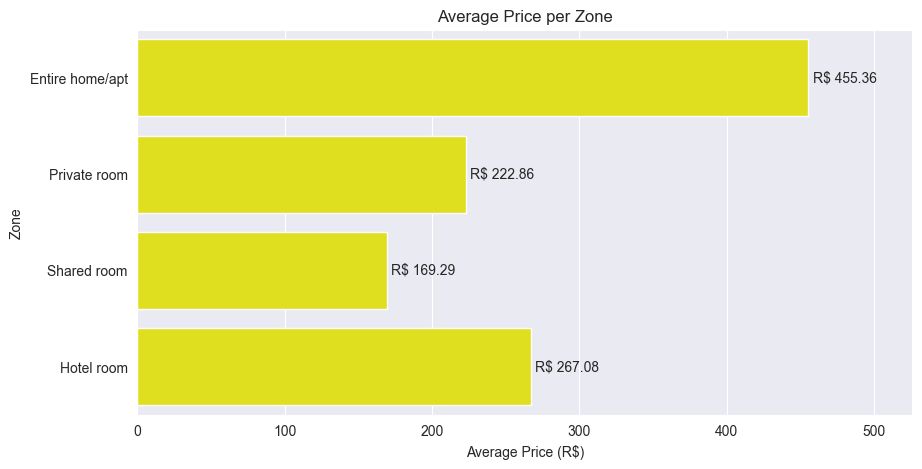

In [128]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='price', y='room_type', color='yellow', errorbar=None)
ax.bar_label(ax.containers[0], fmt='R$ %.2f', padding=3)
ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
plt.title('Average Price per Zone')
plt.xlabel('Average Price (R$)')
plt.ylabel('Zone')
plt.show()